In [1]:
def save(p, name):
    fig = p.get_figure()
    path = f'/Users/rossgreen/PycharmProjects/simulation/images/{name}.png'
    fig.savefig(path)

In [31]:
results = pd.read_csv('evaluation_results.csv').iloc[:, 1:]
results.head()

,average_travel_time,average_deviation_from_free_flow_speed_kmh,total_throughput,episode,model,experiment
0,20.352099,19.352774,675,0,baseline_1,experiment_1
1,22.721495,24.003470,642,0,baseline_2,experiment_1
2,17.981910,9.649807,726,0,baseline_3,experiment_1
3,19.152501,13.691162,713,0,dqn_model,experiment_1
4,19.073038,14.538695,722,0,baseline_1,experiment_2


In [32]:
value_cols = ['average_travel_time', 'average_deviation_from_free_flow_speed_kmh', 'total_throughput']
df = pd.pivot_table(results, values=value_cols, index=['experiment', 'model'])
df.columns = ['Speed Deviation', 'Travel Time', 'Throughput']
df = pd.DataFrame(df.stack()).unstack(1)
df.columns = ['Baseline 1', 'Baseline 2', 'Baseline 3', 'DQN Model']
df.index.names = ['Experiment', 'Metric']
df.index = df.index.set_levels(df.index.levels[0].str.capitalize().str.replace('_', ' '), level=0)
df = df.round(3)
df

Baseline 1  Baseline 2  Baseline 3  DQN Model
Experiment   Metric                                                        
Experiment 1 Speed Deviation      19.353      24.003       9.650     13.691
             Travel Time          20.352      22.721      17.982     19.153
             Throughput          675.000     642.000     726.000    713.000
Experiment 2 Speed Deviation      14.539      22.565      24.033     20.095
             Travel Time          19.073      23.359      23.231     20.935
             Throughput          722.000     619.000     670.000    726.000
Experiment 3 Speed Deviation       8.687      28.611      14.212     15.166
             Travel Time          17.298      25.647      18.576     19.484
             Throughput          687.000     657.000     714.000    666.000
Experiment 4 Speed Deviation      26.550      30.604      26.136     27.360
             Travel Time          21.033      22.570      21.003     21.446
             Throughput          581.000     554.000     587.000    564.000

In [4]:
print(df.to_latex())

\begin{tabular}{llrrrr}
\toprule
             &            &  Baseline 1 &  Baseline 2 &  Baseline 3 &  DQN Model \\
Experiment & Metric &             &             &             &            \\
\midrule
Experiment 1 & Speed Deviation &      19.353 &      24.003 &       9.650 &     13.691 \\
             & Travel Time &      20.352 &      22.721 &      17.982 &     19.153 \\
             & Throughput &     675.000 &     642.000 &     726.000 &    713.000 \\
Experiment 2 & Speed Deviation &      14.539 &      22.565 &      24.033 &     20.095 \\
             & Travel Time &      19.073 &      23.359 &      23.231 &     20.935 \\
             & Throughput &     722.000 &     619.000 &     670.000 &    726.000 \\
Experiment 3 & Speed Deviation &       8.687 &      28.611 &      14.212 &     15.166 \\
             & Travel Time &      17.298 &      25.647 &      18.576 &     19.484 \\
             & Throughput &     687.000 &     657.000 &     714.000 &    666.000 \\
Experiment 4 & Speed D

In [46]:
value_cols = ['average_travel_time', 'average_deviation_from_free_flow_speed_kmh', 'total_throughput']
plotdf = pd.pivot_table(results, values=value_cols, index=['experiment'], columns=['model'])
plotdf

average_deviation_from_free_flow_speed_kmh                        \
model                                        baseline_1 baseline_2 baseline_3   
experiment                                                                      
experiment_1                                  19.352774  24.003470   9.649807   
experiment_2                                  14.538695  22.564626  24.033499   
experiment_3                                  14.900000  28.610562  14.212088   
experiment_4                                  26.550266  30.604397  26.136023   

                        average_travel_time                                   \
model         dqn_model          baseline_1 baseline_2 baseline_3  dqn_model   
experiment                                                                     
experiment_1  13.691162           20.352099  22.721495  17.981910  19.152501   
experiment_2  20.094616           19.073038  23.359289  23.231144  20.934619   
experiment_3  15.166161           17.298302  25.646981  18.576004  19.484484   
experiment_4  27.360000           21.032702  22.569916  21.002612  21.445508   

             total_throughput                                  
model              baseline_1 baseline_2 baseline_3 dqn_model  
experiment                                                     
experiment_1              675        642        726       713  
experiment_2              722        619        670       726  
experiment_3              687        657        714       666  
experiment_4              581        554        587       564

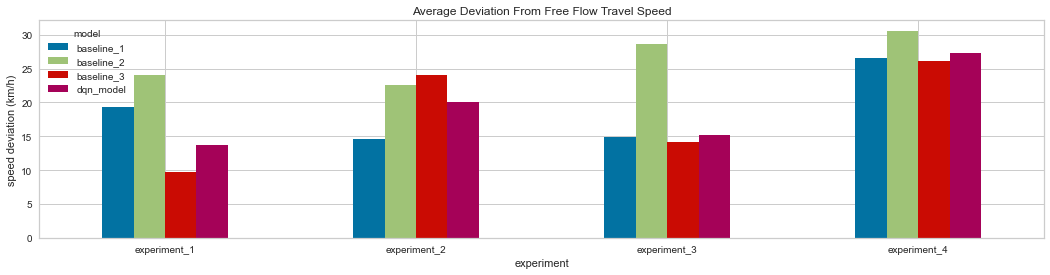

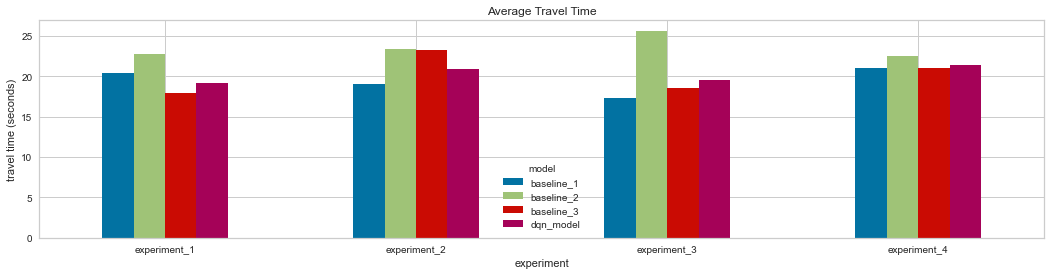

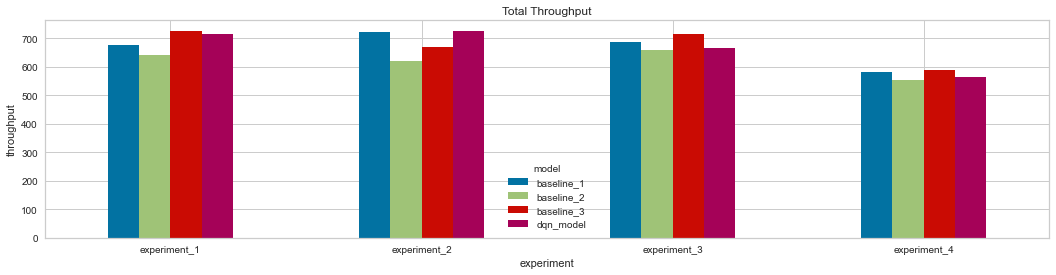

In [47]:
p = plotdf.plot.bar(y='average_deviation_from_free_flow_speed_kmh', 
                      ylabel='speed deviation (km/h)',
                      figsize=(18,4), rot=0,
                      title='Average Deviation From Free Flow Travel Speed')

save(p, 'results_graph1')

p = plotdf.plot.bar(y='average_travel_time', 
                      ylabel='travel time (seconds)',
                      figsize=(18,4), 
                      rot=0, 
                      title='Average Travel Time')

save(p, 'results_graph2')

p = plotdf.plot.bar(y='total_throughput',
                      ylabel='throughput',
                      figsize=(18,4), rot=0,
                      title='Total Throughput'
                      )

save(p, 'results_graph3')

In [8]:
history = pd.read_csv('history.csv').iloc[:, 1:]
history.head()

,step,action,upstream_demand,downstream_demand,upstream_flow,downstream_flow,upstream_speed,downstream_speed,upstream_density,downstream_density,episode,model,experiment
0,1,1,7971.085718,7028.914282,0.000056,0.000028,0.996704,0.995196,0.007143,0.003571,0,baseline_1,experiment_1
1,2,1,8440.311037,6559.688963,0.000167,0.000083,0.860261,0.980441,0.032143,0.017857,0,baseline_1,experiment_1
2,3,1,8905.822903,6094.177097,0.000167,0.000194,0.842703,0.942259,0.046429,0.035714,0,baseline_1,experiment_1
3,4,1,9365.782929,5634.217071,0.000194,0.000222,0.882949,0.920946,0.046429,0.050000,0,baseline_1,experiment_1
4,5,1,9818.374652,5181.625348,0.000306,0.000278,0.897246,0.907353,0.057143,0.064286,0,baseline_1,experiment_1


In [9]:
e1 = history.loc[history.experiment == 'experiment_1']

In [198]:
e1p = pd.pivot_table(e1, values=['speed_imbalance'], columns=['model'], index=['step'])
e1p.columns = e1p.columns.droplevel(0)
e1p

model,baseline_1,baseline_2,baseline_3,dqn_model
step,,,,
1,0.096233,-0.003619,0.096122,-0.099097
2,-0.010574,-0.020837,-0.010930,0.019614
3,-0.008194,-0.013048,-0.002779,0.024466
4,-0.012956,-0.009257,-0.000719,0.009632
5,-0.016511,-0.008940,-0.003663,0.005798
...,...,...,...,...
95,0.286946,0.367092,0.049961,0.070583
96,0.277614,0.361966,0.052793,0.062872
97,0.273534,0.353878,0.052758,0.059325


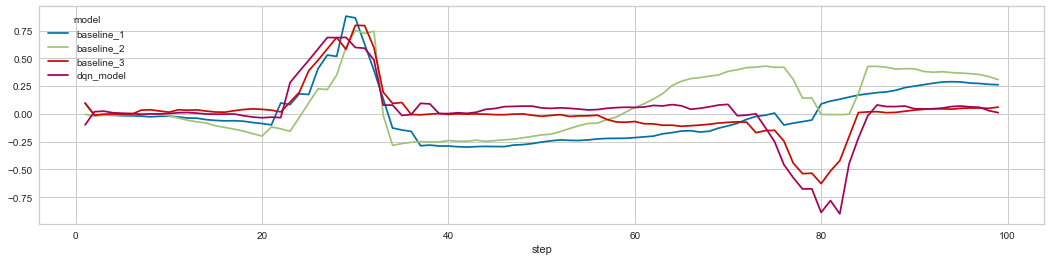

In [199]:
e1p.plot(figsize=(18,4));

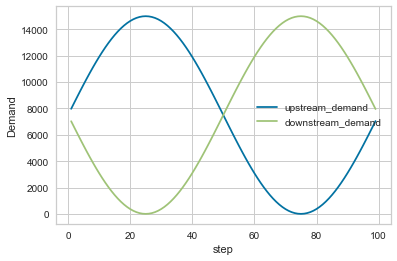

In [34]:
df1 = history.loc[history.experiment == 'experiment_4']
df2 = df1.loc[df1.model == 'baseline_1']
df3 = df2.loc[df2.episode == 0]
ax = df3.plot(x='step', y='upstream_demand')
p = df3.plot(x='step', y='downstream_demand', ax=ax, ylabel='Demand')
#save(p, 'exp3_demand')

In [26]:
df = pd.read_csv('sensitivity.csv')
df = df.iloc[:, 1:]
df.index = [0.1, 0.25, 0.5, 1, 2]
df = df.round(3)

df

,average_travel_time,average_deviation_from_free_flow_speed_kmh,total_throughput
0.10,18.440,10.846,762
0.25,18.276,10.247,759
0.50,18.171,11.274,740
1.00,18.718,13.257,753
2.00,17.027,9.002,700


In [23]:
df = pd.read_csv('sensitivity.csv')
df = df.iloc[:, 1:]
df.index = [0.1, 0.25, 0.5, 1, 2]
df = df.round(3)
df = df.reset_index()
df.columns = ['Policy Frequency', 'Speed Deviation', 'Travel Time', 'Throughput']
df

,Policy Frequency,Speed Deviation,Travel Time,Throughput
0,0.10,18.440,10.846,762
1,0.25,18.276,10.247,759
2,0.50,18.171,11.274,740
3,1.00,18.718,13.257,753
4,2.00,17.027,9.002,700


In [24]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Policy Frequency &  Speed Deviation &  Travel Time &  Throughput \\
\midrule
0 &              0.10 &           18.440 &       10.846 &         762 \\
1 &              0.25 &           18.276 &       10.247 &         759 \\
2 &              0.50 &           18.171 &       11.274 &         740 \\
3 &              1.00 &           18.718 &       13.257 &         753 \\
4 &              2.00 &           17.027 &        9.002 &         700 \\
\bottomrule
\end{tabular}



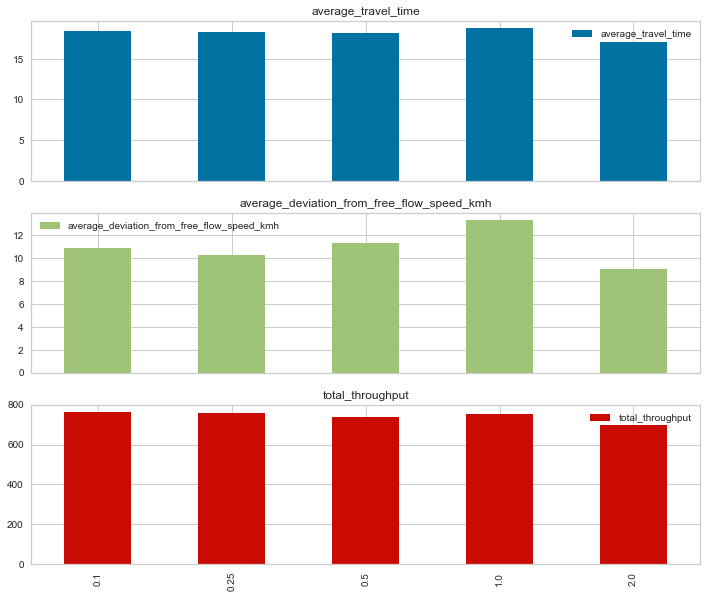

In [30]:
p = df.plot.bar(subplots=True, figsize=(12,10));